# Importar bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Cargar el dataset

In [2]:
file_path = "dataset_aleatorio.csv"
data = pd.read_csv(file_path)

In [5]:
# Simular etiquetas (y) para el modelo de regresión logística
# Aquí asumimos que queremos predecir si la suma de las primeras 10 columnas supera un umbral
threshold = 5000
data["target"] = (data.iloc[:, :10].sum(axis=1) > threshold).astype(int)


In [6]:
# Dividir el dataset en características (X) y etiquetas (y)
X = data.drop(columns=["target"])
y = data["target"]

In [7]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [11]:
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Precisión del modelo:
0.9989333333333333


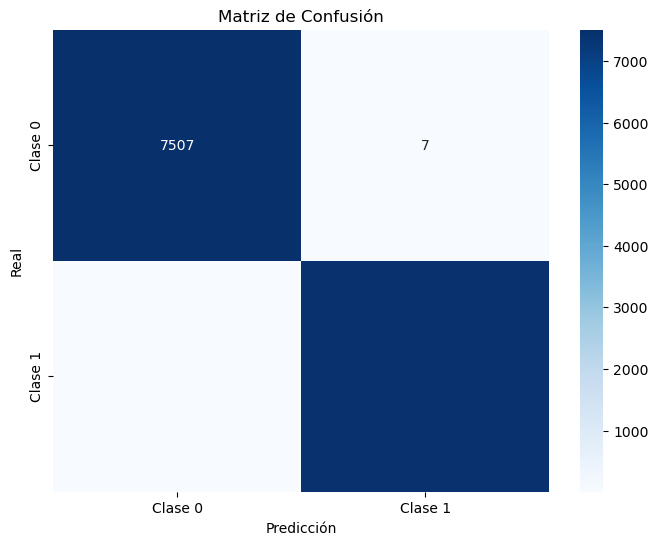

In [12]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()